# HW2: Algorithm Implementation and Basic Model Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [3]:
params ={
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize' : 22,
    'axes.labelsize': 20,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
}
pylab.rcParams.update(params)

custom_colors = ['#0072B2', '#FC6A03']


In [4]:
test_d = pd.read_csv('data/test.csv')
train_d = pd.read_csv('data/train.csv')

In [5]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

## Part 1: Basic model selection with k-Nearest Neighbors

### Q1

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


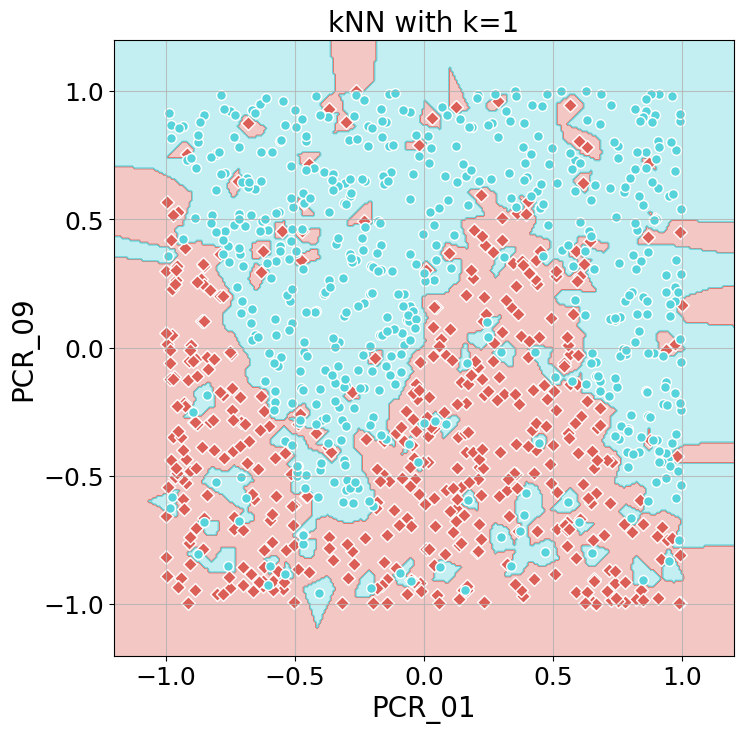

In [6]:
knn_neighbors1 = KNeighborsClassifier(n_neighbors=1)
temp_data = train_d[['PCR_01', 'PCR_09']]

knn_neighbors1.fit(temp_data, train_d['spread'])
visualize_clf(knn_neighbors1, temp_data, train_d['spread'], 'kNN with k=1' ,'PCR_01', 'PCR_09')

### Q2

In [7]:
iter_on = list(range(1 ,20 ,2)) + list(range(20, 871, 85))

In [8]:
train_scores = []
val_scores = []
for k in iter_on:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, temp_data, train_d['spread'], cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(cv_results['train_score'].mean())
    val_scores.append(cv_results['test_score'].mean())

In [9]:
best_k = iter_on[np.argmax(val_scores)]
print('Best k: ', best_k)
print('Mean train score: ', train_scores[np.argmax(val_scores)])
print('Validation score: ', val_scores[np.argmax(val_scores)])

Best k:  7
Mean train score:  0.8835714285714287
Validation score:  0.871


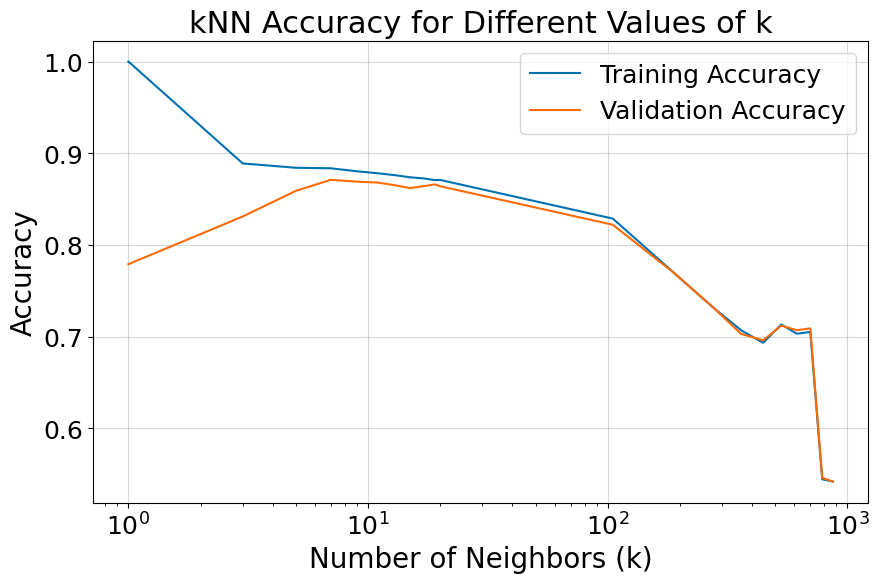

In [10]:
plt.figure(figsize=(10, 6))

plt.semilogx(iter_on, train_scores, label='Training Accuracy', color= custom_colors[0])
plt.semilogx(iter_on, val_scores, label='Validation Accuracy', color= custom_colors[1])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for Different Values of k')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Q4

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


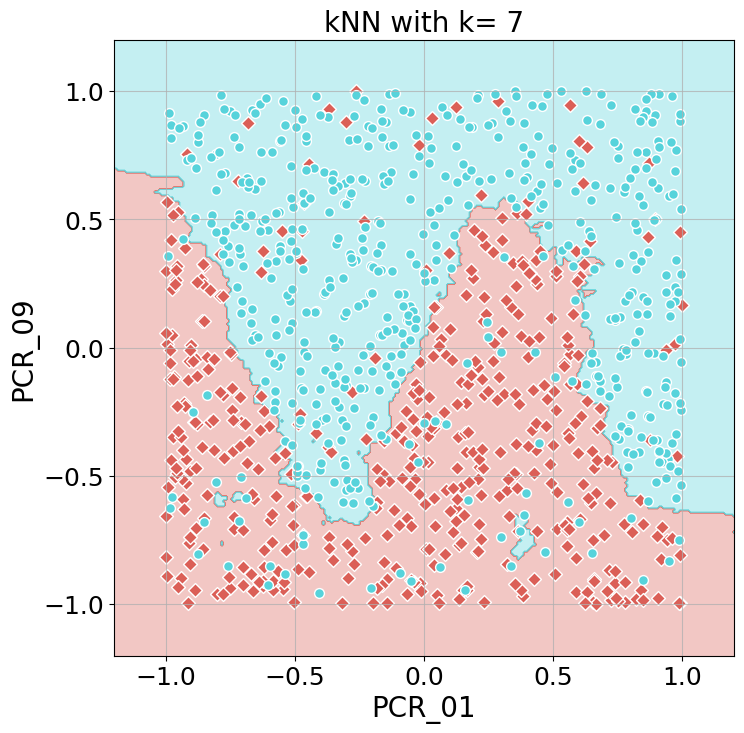

In [ ]:
best_k_knn = KNeighborsClassifier(n_neighbors=best_k)
best_k_knn.fit(temp_data, train_d['spread'])
visualize_clf(best_k_knn, temp_data, train_d['spread'], "kNN with k=" + str(best_k)
               ,'PCR_01', 'PCR_09')


In [12]:
best_k_kNN_score = best_k_knn.score(test_d[['PCR_01', 'PCR_09']], test_d['spread'])
print('Best kNN score: ', best_k_kNN_score)

Best kNN score:  0.872


### Q5

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


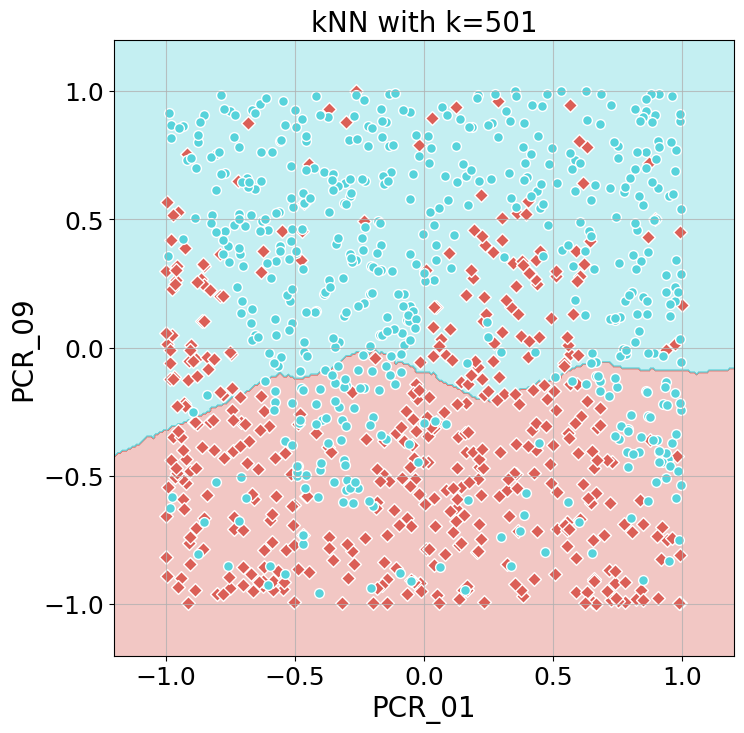

In [13]:
knn_neighbors501 = KNeighborsClassifier(n_neighbors=501)
knn_neighbors501.fit(temp_data, train_d['spread'])
visualize_clf(knn_neighbors501, temp_data, train_d['spread'], "kNN with k=501"
               ,'PCR_01', 'PCR_09')

### Q6

In [14]:
train_scores_all = []
val_scores_all = []
for k in iter_on:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, train_d.drop(['spread', 'risk'], axis=1), train_d['spread'], cv=8, scoring='accuracy', return_train_score=True)
    train_scores_all.append(cv_results['train_score'].mean())
    val_scores_all.append(cv_results['test_score'].mean())

In [ ]:
best_k_all = iter_on[np.argmax(val_scores_all)]
print('Best k: ', best_k_all)
print('Mean train score: ', train_scores_all[np.argmax(val_scores_all)])
print('Validation score: ', val_scores_all[np.argmax(val_scores_all)])

Best k:  105
Mean train score:  0.6975714285714285
Validation score:  0.6829999999999999


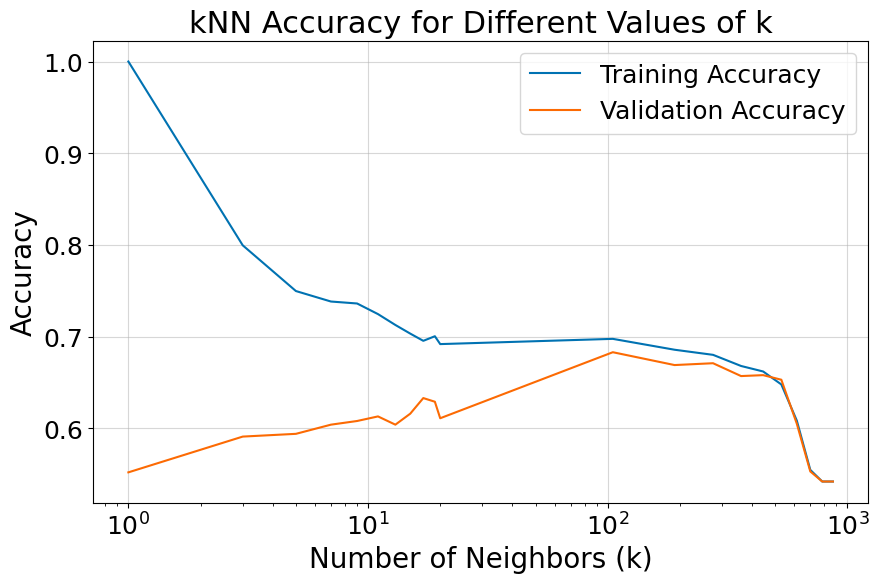

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(iter_on, train_scores_all, label='Training Accuracy', color= custom_colors[0])
plt.semilogx(iter_on, val_scores_all, label='Validation Accuracy', color= custom_colors[1])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for Different Values of k')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Q7

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
decision_tree.fit(train_d.drop(['spread', 'risk'], axis=1), train_d['risk'])
decision_tree_score = decision_tree.score(train_d.drop(['spread', 'risk'], axis=1), train_d['risk'])

In [ ]:
decision_tree_score

0.726

Text(0.5, 1.0, 'Decision Tree - ID3 with max_depth of 3')

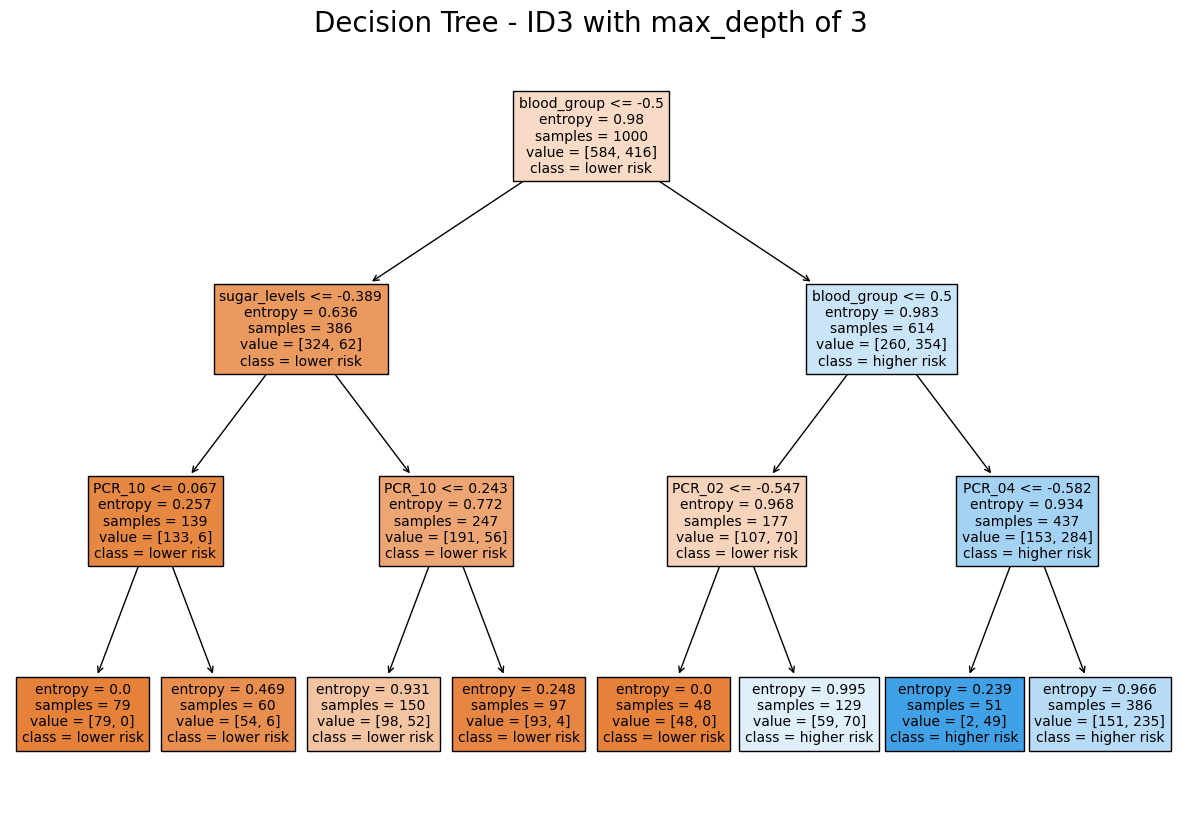

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(decision_tree,fontsize=10, ax=ax,feature_names=train_d.drop(['spread', 'risk'], axis=1).columns, 
          class_names=['lower risk', 'higher risk'],filled=True)
plt.title('Decision Tree - ID3 with max_depth of 3', fontsize=20)

### Q8

In [ ]:
# using GridSearchCV to find the best max_depth and min_samples_leaf for the decision tree using 2 folds
param_grid = {'max_depth': np.arange(5, 15), 'min_samples_leaf': np.arange(5, 20)}
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree_cv = GridSearchCV(decision_tree, param_grid, cv=8, scoring='accuracy', return_train_score=True)
decision_tree_cv.fit(train_d.drop(['spread', 'risk'], axis=1), train_d['risk'])


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             return_train_score=True, scoring='accuracy')

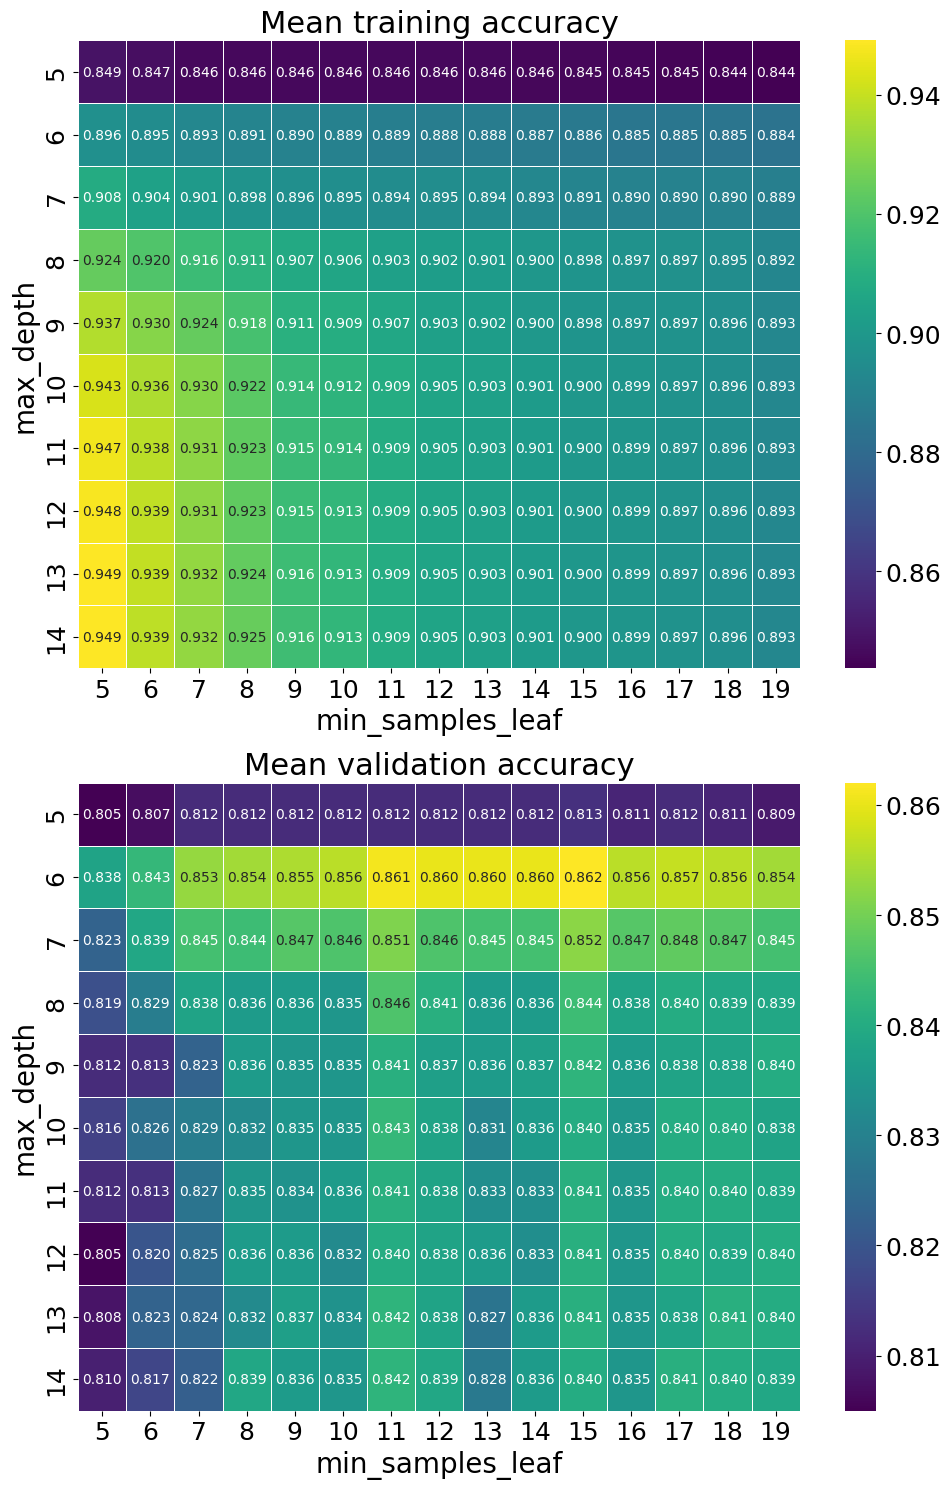

In [ ]:
mean_train_score = decision_tree_cv.cv_results_['mean_train_score'].reshape(10, 15)
mean_val_score = decision_tree_cv.cv_results_['mean_test_score'].reshape(10, 15)
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.heatmap(mean_train_score, annot=True, cmap='viridis', xticklabels=np.arange(5, 20), 
            yticklabels=np.arange(5, 15), ax=ax[0], linewidths=0.5, linecolor='white', fmt='.3f')
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_ylabel('max_depth')
ax[0].set_title('Mean training accuracy')

sns.heatmap(mean_val_score, annot=True, cmap='viridis', xticklabels=np.arange(5, 20), 
            yticklabels=np.arange(5, 15), ax=ax[1], linewidths=0.5, linecolor='white', fmt='.3f')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_ylabel('max_depth')
ax[1].set_title('Mean validation accuracy')

plt.tight_layout()

plt.show()

### Q9

In [ ]:
best_tree = decision_tree_cv.best_estimator_
best_tree.fit(train_d.drop(['spread', 'risk'], axis=1), train_d['risk'])
best_tree_score = best_tree.score(train_d.drop(['spread', 'risk'], axis=1), train_d['risk'])
print('Best tree score: ', best_tree_score)

Best tree score:  0.887


## Part 3: Linear SVM and the Polynomial kernel

### Soft SVM

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        loss = np.square(norm)
        loss += C * np.sum(np.maximum(np.zeros_like(hinge_inputs), 1 - hinge_inputs))

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        Y = y.reshape(-1, 1)
        margin = (X.dot(w) + b).reshape(-1, 1)
        z = np.multiply(margin, Y)
        f_res = np.where(z < 1, -1, 0)
        g_w = 2 * w + C * np.sum(np.multiply(np.multiply(f_res,X), Y), axis=0)
        g_b = C * np.sum(np.multiply(f_res, Y), axis=0)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign((X.dot(self.w) + self.b).reshape(-1, 1))
        np.where(y_pred==0, 1, y_pred)
        

        return y_pred


### Verify gradients

In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


### Q10

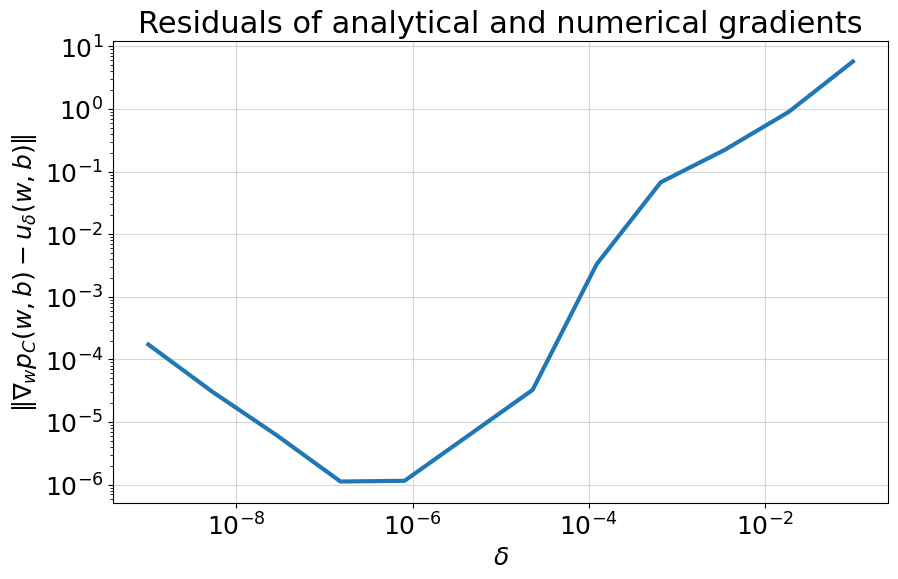

In [ ]:
X = train_d[['PCR_01', 'PCR_09']].to_numpy()
y = train_d['spread'].to_numpy()
compare_gradients(X, y, deltas=np.logspace(-9, -1,12))

### Q11

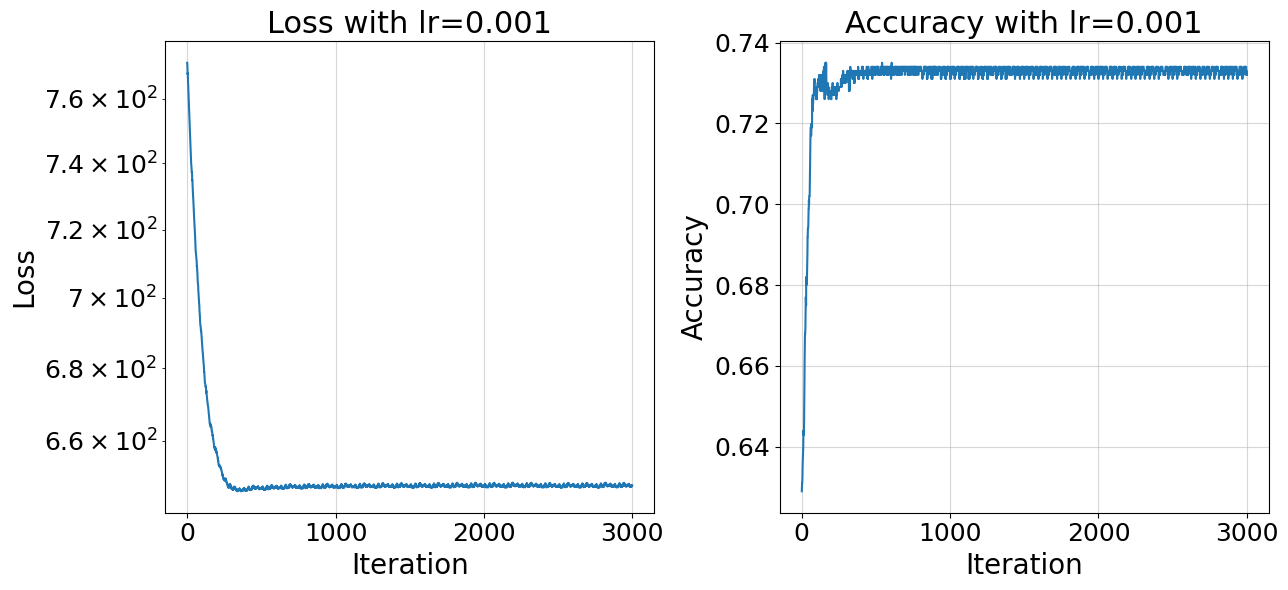

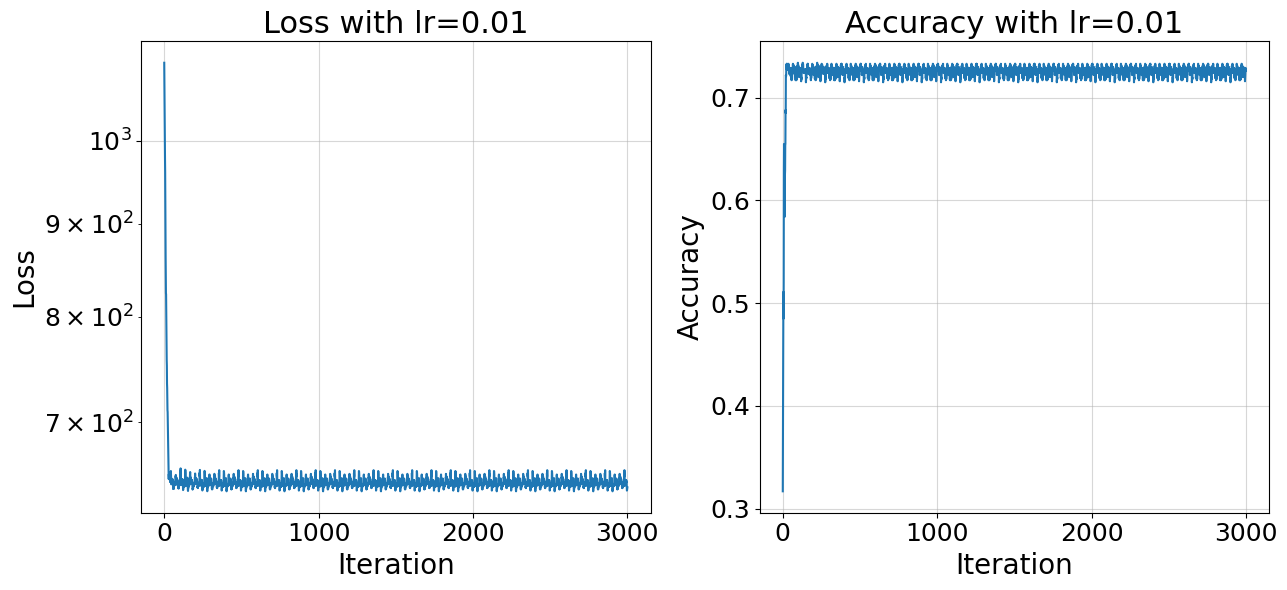

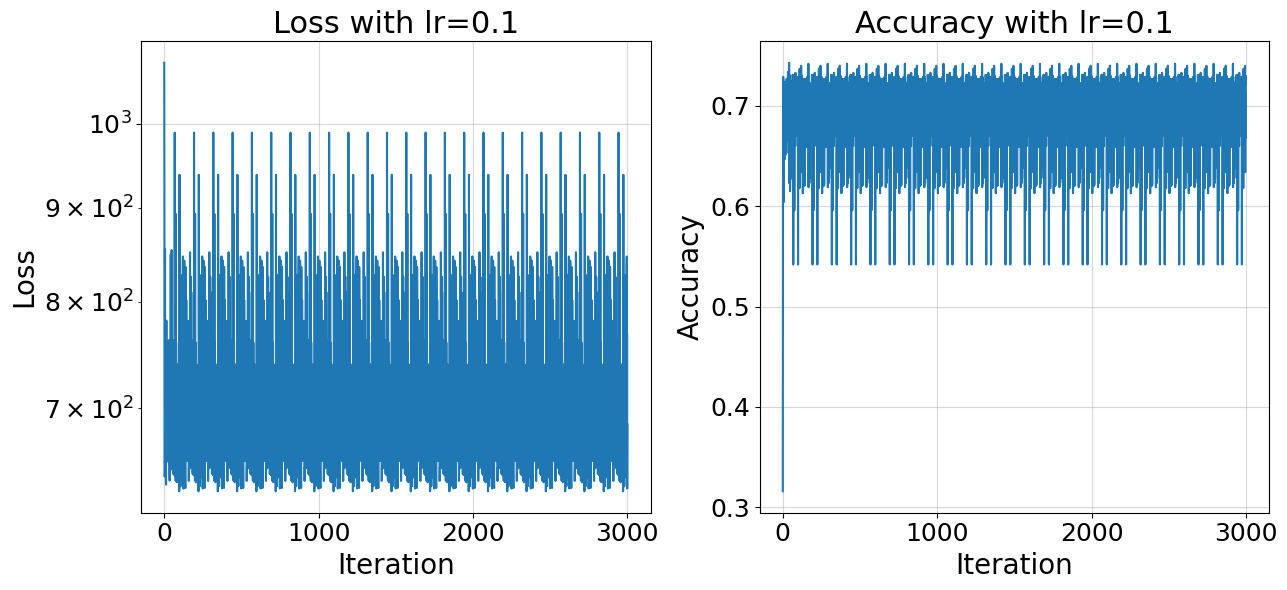

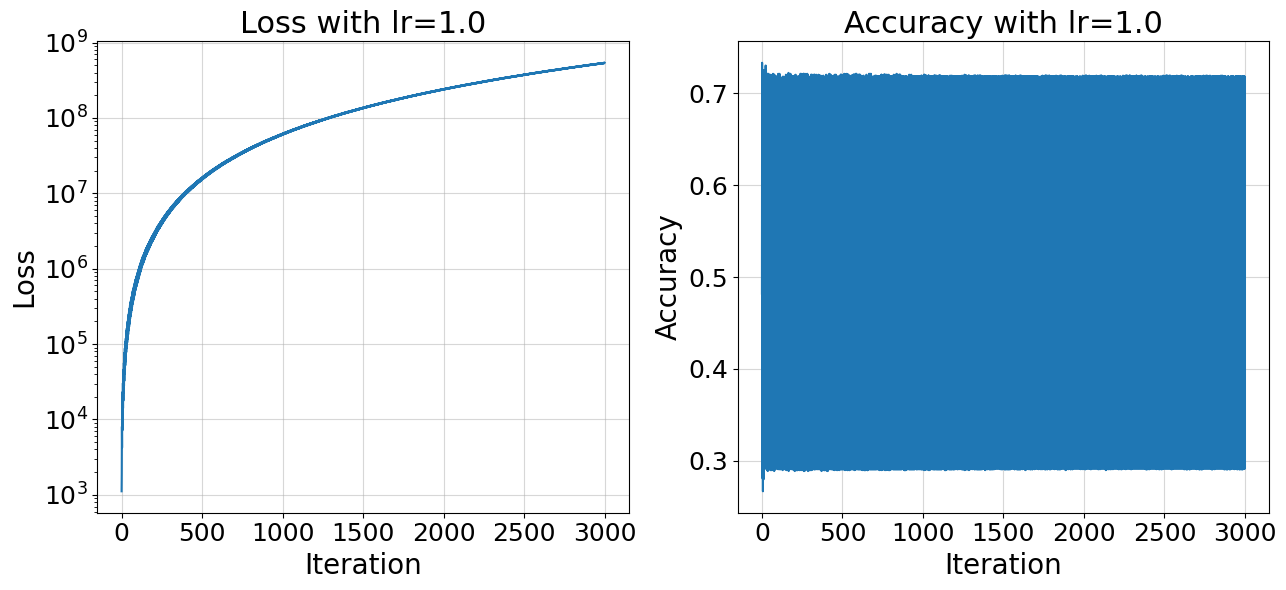

In [ ]:
for lr in np.logspace(-3, 0, 4):
    clf = SoftSVM(C=1, lr=lr)
    losses, accuracies = clf.fit_with_logs(X, y, max_iter=3000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Loss with lr={}".format(lr))
    plt.semilogy(losses), plt.xlabel("Iteration"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Accuracy with lr={}".format(lr))
    plt.plot(accuracies), plt.xlabel("Iteration"), plt.ylabel("Accuracy")
    plt.tight_layout()

In [ ]:
clf = SoftSVM(C=1, lr=0.001)
loss ,acc = clf.fit_with_logs(X, y)
print("The max accuracy is {:.3f}".format(np.max(acc)))
print("The iteration of max accuracy is {}".format(np.argmax(acc)))
print("The min loss is {:.3f}".format(np.min(loss)))
print("The iteration of min loss is {}".format(np.argmin(loss)))

The max accuracy is 0.735
The iteration of max accuracy is 698
The min loss is 646.799
The iteration of min loss is 1687


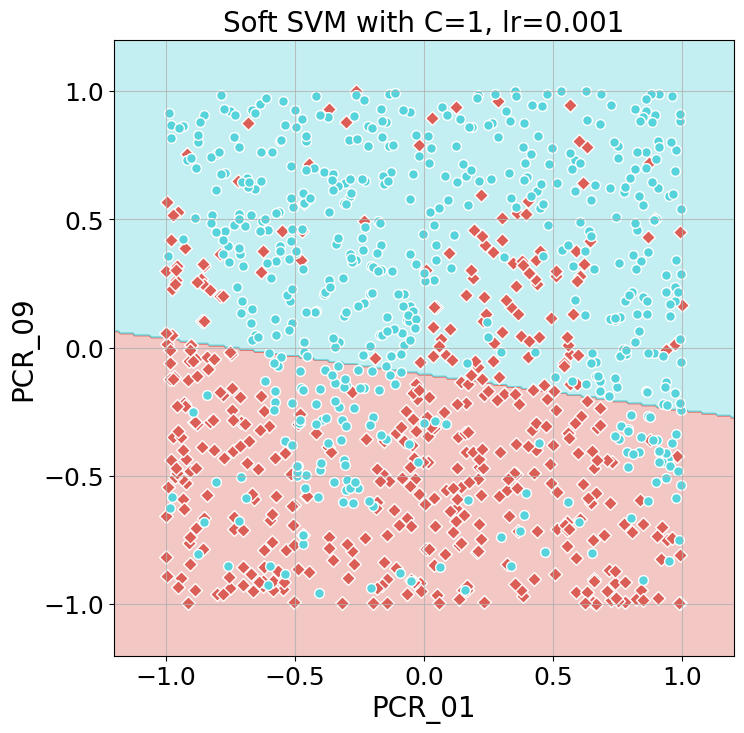

In [ ]:

clf = SoftSVM(C=1, lr=0.001)
clf.fit(X, y)
visualize_clf(clf, X, y, title="Soft SVM with C=1, lr=0.001", xlabel="PCR_01", ylabel="PCR_09")

### Q13

In [ ]:
C = 1e13
from sklearn.preprocessing import StandardScaler
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3, include_bias=False)),
        ('scaler', StandardScaler()),
        ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])

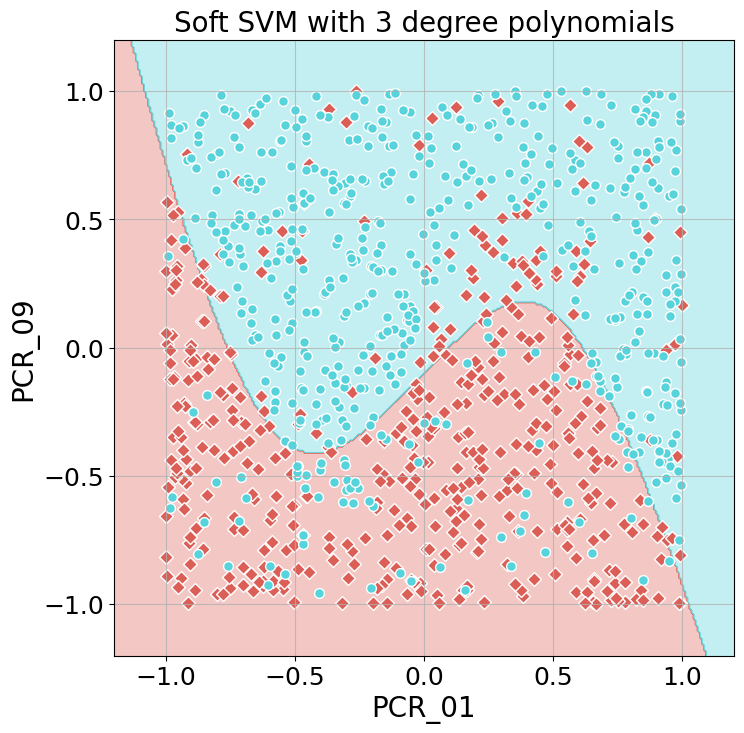

In [ ]:
svm_clf.fit(X, y)
visualize_clf(svm_clf, X, y, title="Soft SVM with 3 degree polynomials", xlabel="PCR_01", ylabel="PCR_09")

In [ ]:
X_test = test_d[['PCR_01', 'PCR_09']].to_numpy()
y_test = test_d['spread'].to_numpy()
print("The training score of SVM with 3 degree polynomials is {:.3f}".format(svm_clf.score(X, y)))
print("The test score of SVM with 3 degree polynomials is {:.3f}".format(svm_clf.score(X_test, y_test)))

The training score of SVM with 3 degree polynomials is 0.817
The test score of SVM with 3 degree polynomials is 0.812


### Q14

In [ ]:
accs = []
for i in range(0, 5):
    svm_clf.fit(X, y)
    accs.append(svm_clf.score(X, y))

print(accs)
print("The mean of training score of SVM with 3 degree polynomials is {:.3f}".format(np.mean(accs)))
print("The std of training score of SVM with 3 degree polynomials is {:.3f}".format(np.std(accs)))


[0.817, 0.817, 0.817, 0.819, 0.819]
The mean of training score of SVM with 3 degree polynomials is 0.818
The std of training score of SVM with 3 degree polynomials is 0.001


## Part 4: The RBF kernel

### Q16

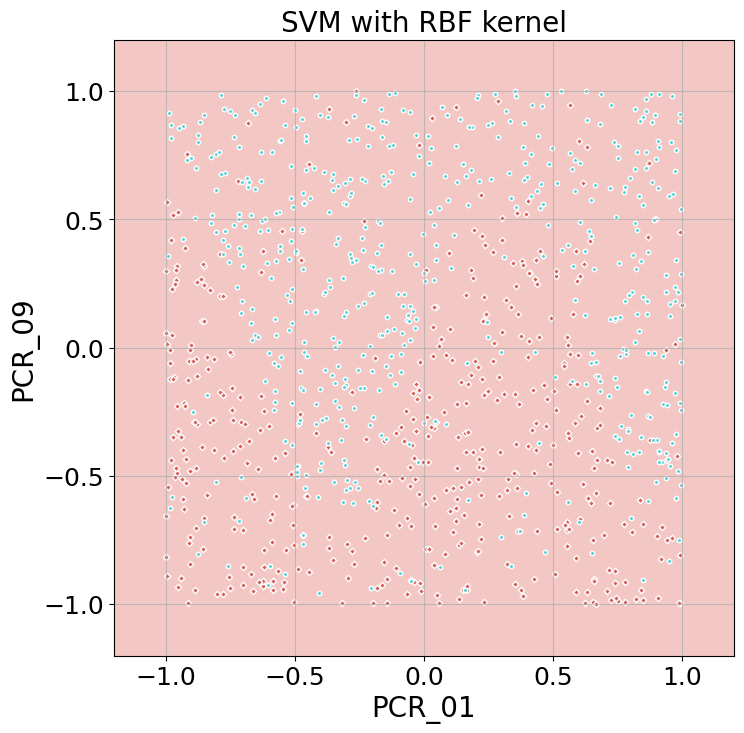

In [ ]:
visualize_clf(SVC(C=1e4, kernel='rbf', gamma=5e10).fit(X,y), X, y , title="SVM with RBF kernel", xlabel="PCR_01", ylabel="PCR_09", marker_size=10)

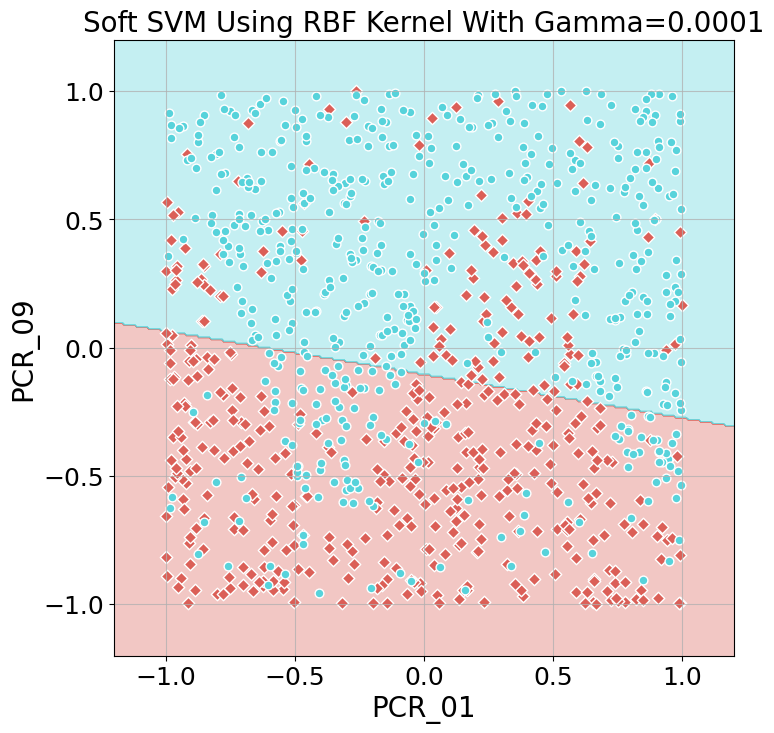

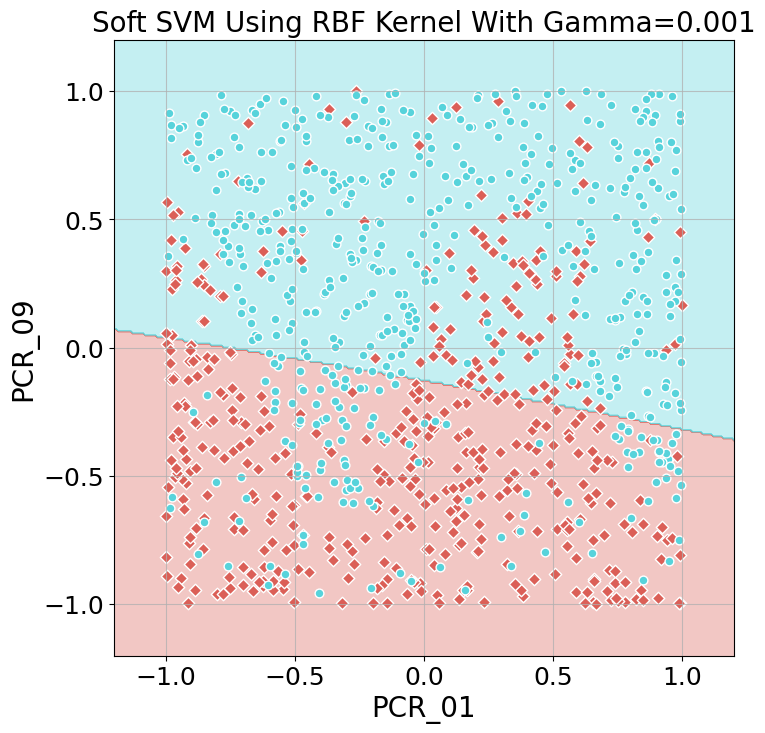

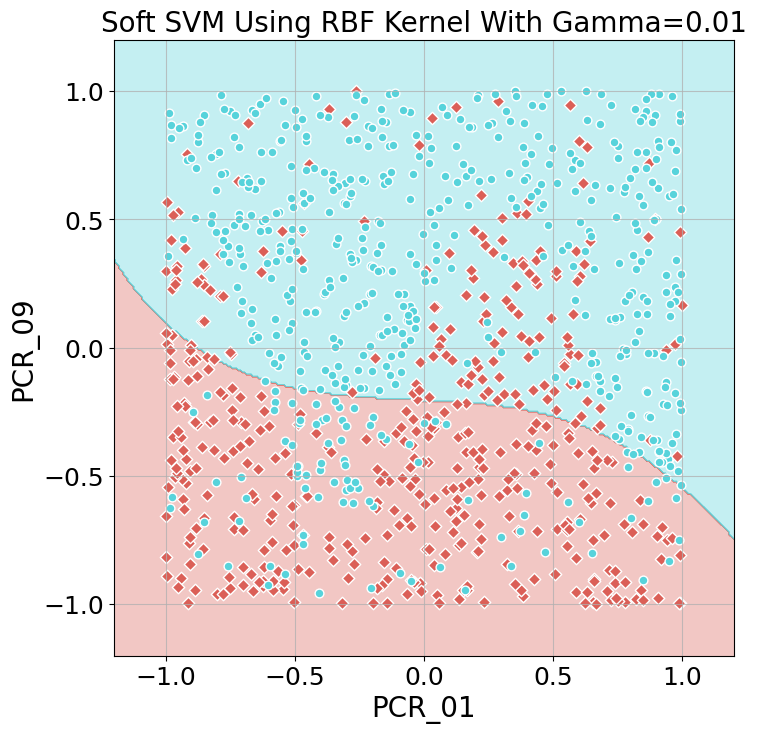

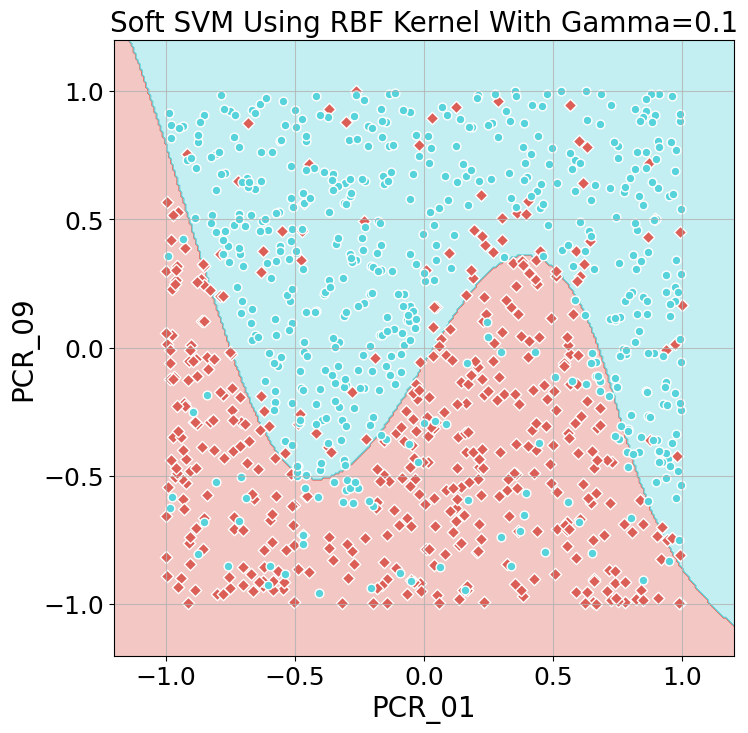

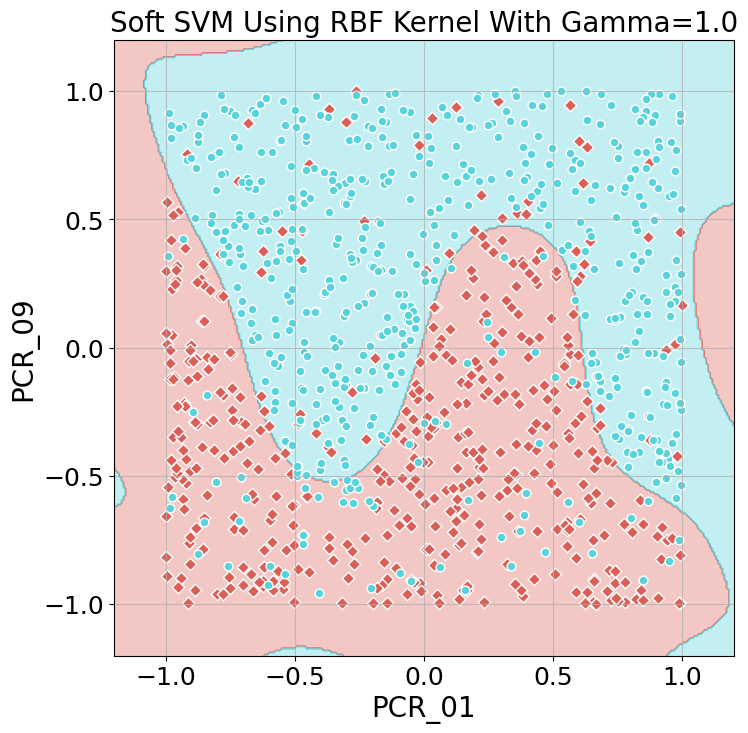

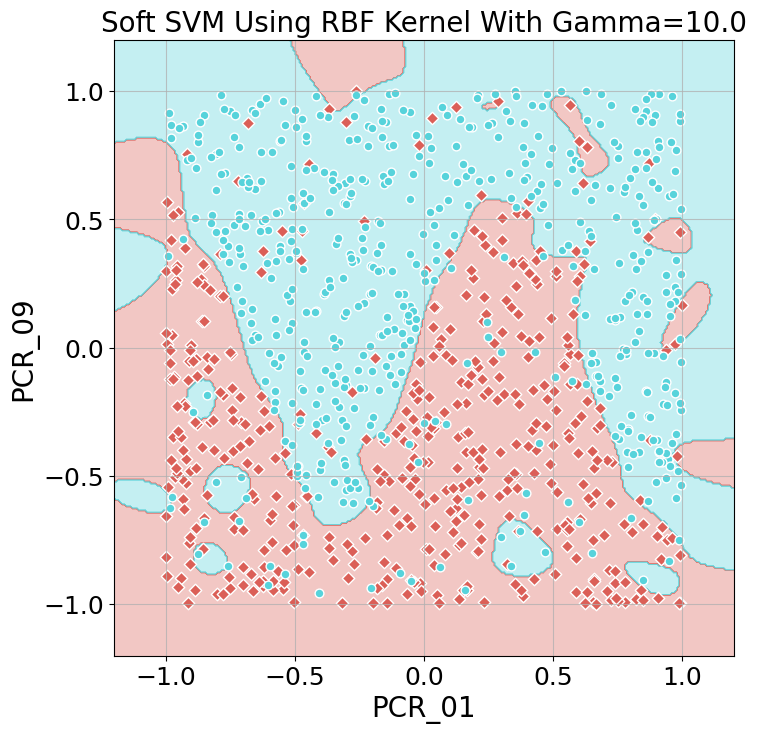

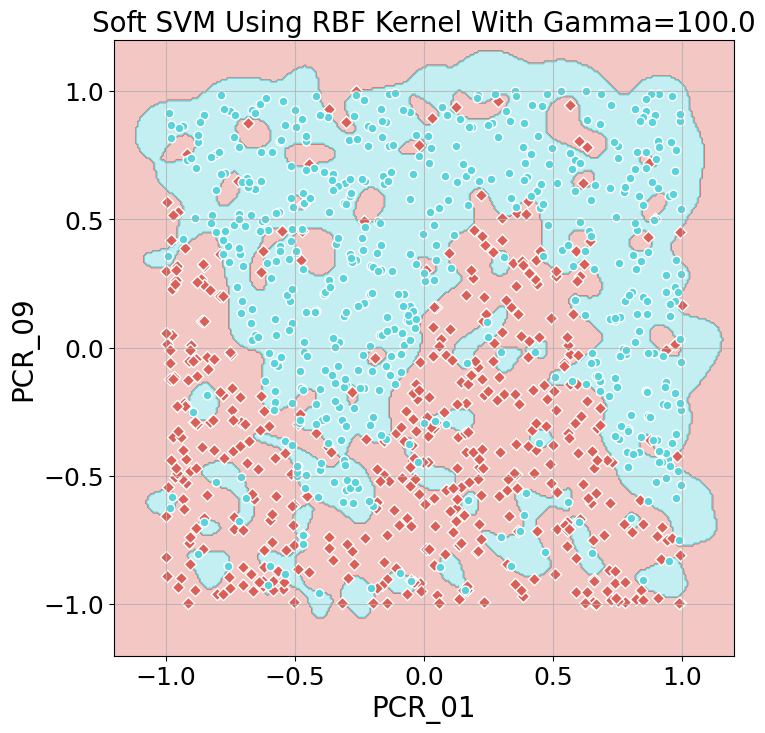

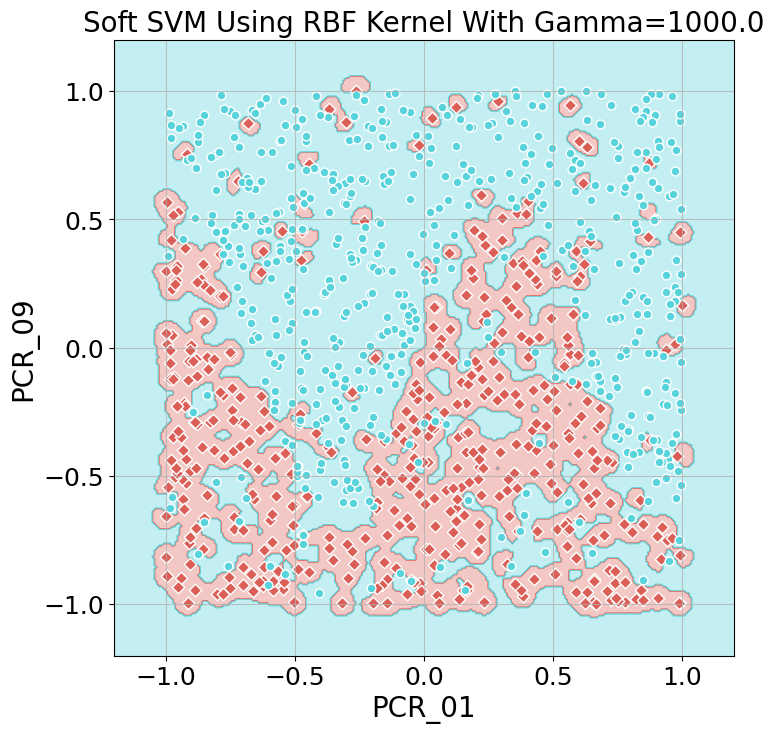

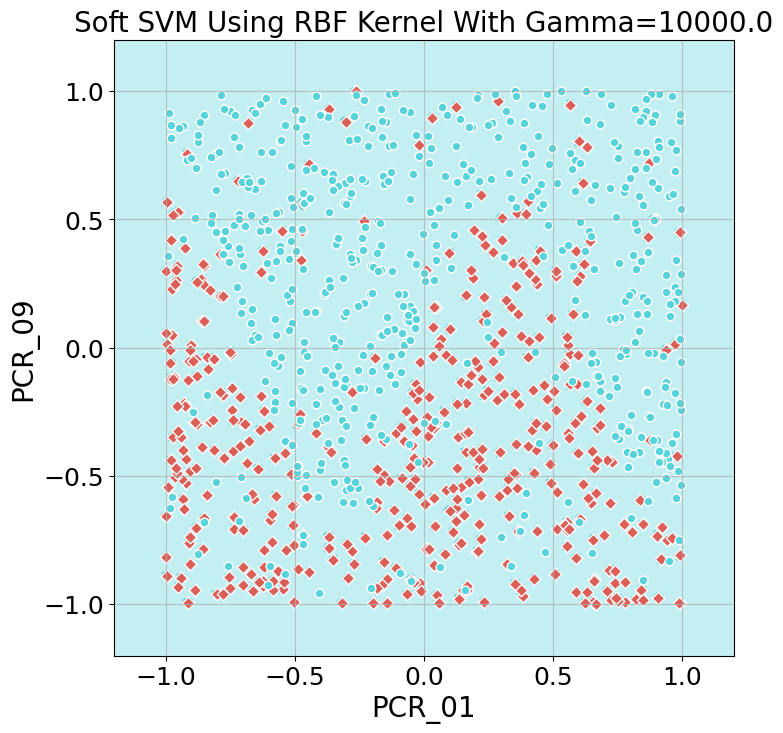

In [ ]:
for g in np.logspace(-4, 4, 9):
    svm = SVC(C=1e4, kernel='rbf',gamma=g)
    svm.fit(X, y)
    visualize_clf(svm, X, y, title="Soft SVM Using RBF Kernel With Gamma={}".format(g), 
                  xlabel="PCR_01", ylabel="PCR_09", marker_size=40)

### Q18

In [ ]:
iter_on = np.logspace(-1, 1, 10)
C = 1e4
train_scores = []
val_scores = []
for g in iter_on:
    knn = SVC(C=C, kernel='rbf',gamma=g)
    cv_results = cross_validate(knn, temp_data, train_d['spread'], cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(cv_results['train_score'].mean())
    val_scores.append(cv_results['test_score'].mean())

In [ ]:
print(iter_on)

[ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]


In [ ]:
best_g = iter_on[np.argmax(val_scores)]
print('Best gamma: ', best_g)
print('Mean train score: ', train_scores[np.argmax(val_scores)])
print('Validation score: ', val_scores[np.argmax(val_scores)])

Best gamma:  2.1544346900318834
Mean train score:  0.8787142857142858
Validation score:  0.871


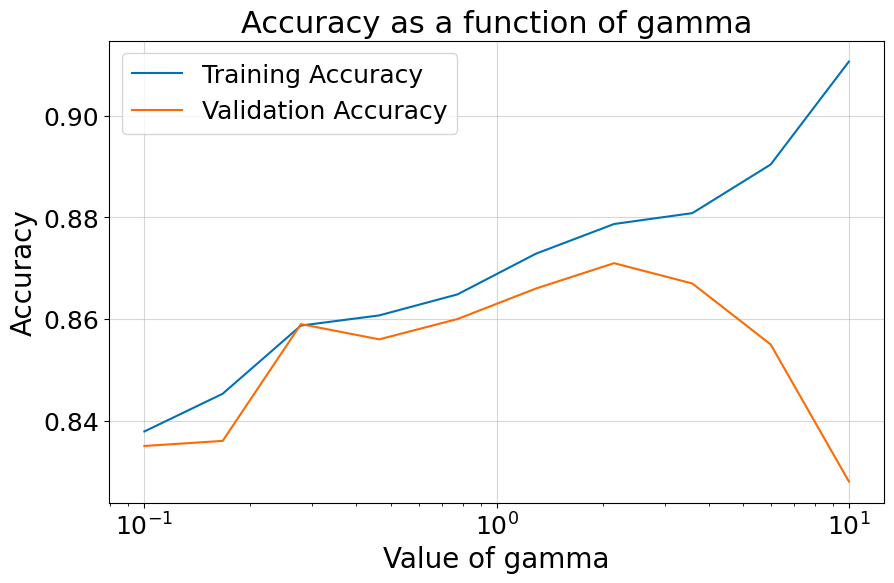

In [ ]:
plt.figure(figsize=(10, 6))

plt.semilogx(iter_on, train_scores, label='Training Accuracy', color= custom_colors[0])
plt.semilogx(iter_on, val_scores, label='Validation Accuracy', color= custom_colors[1])
plt.xlabel('Value of gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of gamma')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Q19

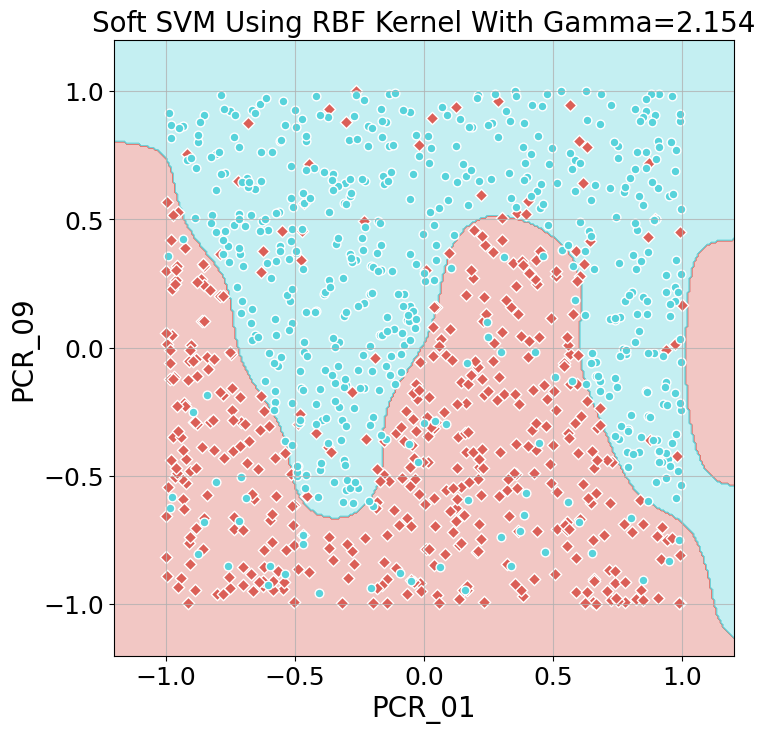

In [ ]:
svm = SVC(C=1e4, kernel='rbf',gamma=best_g)
svm.fit(X, y)
visualize_clf(svm, X, y, title="Soft SVM Using RBF Kernel With Gamma={:.3f}".format(best_g)
                , xlabel="PCR_01", ylabel="PCR_09", marker_size=40)


In [ ]:
print("The training score of SVM with RBF kernel is {:.3f}".format(svm.score(X, y)))
print("The test score of SVM with RBF kernel is {:.3f}".format(svm.score(X_test, y_test)))

The training score of SVM with RBF kernel is 0.880
The test score of SVM with RBF kernel is 0.876
